## Predicting Spotify Song Popularity
Spotify is a digital music service that enables users to remotely source millions of different songs on various record labels from a laptop, smartphone or other device. To recommend new music to users, and to be able to internally classify songs, Spotify assigns each song values from 17 different attributes/features. These features are mostly numerical values, but include some categorical data as well (the key the song is in, for instance). Spotify also assigns each song a popularity score, based on total number of clicks/listens.

## Strategy
1. Linear Regression to predict popularity score
2. Logistic Regression to predict popular/not popular

## Approach
I tried create a logistic regression model, in order to predict 'Popular' or 'Not Popular', sampled by the cutoff methodology. Basically, all songs that had a popularity score at or above the popularity score cutoff were flagged as having a popularity binary value of 1, and all songs below the cutoff were flagged as having a 0. 

## Second Model: Logistic Regression

In [441]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px


In [442]:
df=pd.read_csv("SpotifyAudioFeaturesApril2019.csv")
df.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [443]:
df.shape

(130663, 17)

In [444]:
# the object and numeical attributes
object_attributes = list(df.select_dtypes(include=['object']).columns)
numerical_attributes = list(df.select_dtypes(include=['float64', 'int64']).columns)
print('object_attributes:', object_attributes)
print('numerical_attributes:', numerical_attributes)
categorical_cols = ['key', 'mode', 'time_signature']

object_attributes: ['artist_name', 'track_id', 'track_name']
numerical_attributes: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']


In [446]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       130663 non-null  object 
 1   track_id          130663 non-null  object 
 2   track_name        130663 non-null  object 
 3   acousticness      130663 non-null  float64
 4   danceability      130663 non-null  float64
 5   duration_ms       130663 non-null  int64  
 6   energy            130663 non-null  float64
 7   instrumentalness  130663 non-null  float64
 8   key               130663 non-null  int64  
 9   liveness          130663 non-null  float64
 10  loudness          130663 non-null  float64
 11  mode              130663 non-null  int64  
 12  speechiness       130663 non-null  float64
 13  tempo             130663 non-null  float64
 14  time_signature    130663 non-null  int64  
 15  valence           130663 non-null  float64
 16  popularity        13

In [449]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,130663.000000,130663.000000,1.306630e+05,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000
mean,0.342500,0.581468,2.126331e+05,0.569196,0.224018,5.231894,0.194886,-9.974006,0.607739,0.112015,119.473353,3.878986,0.439630,24.208988
std,0.345641,0.190077,1.231551e+05,0.260312,0.360328,3.602701,0.167733,6.544379,0.488256,0.124327,30.159636,0.514403,0.259079,19.713191
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,1.639225e+05,0.396000,0.000000,2.000000,0.097500,-11.898000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000
50%,0.203000,0.605000,2.019010e+05,0.603000,0.000149,5.000000,0.124000,-7.979000,1.000000,0.055900,120.027000,4.000000,0.420000,22.000000
75%,0.636000,0.727000,2.410475e+05,0.775000,0.440000,8.000000,0.236000,-5.684000,1.000000,0.129000,139.642000,4.000000,0.638000,38.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


Text(100, 100, 'max: 100')

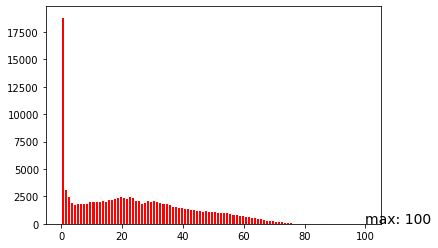

In [450]:
plt.hist(df.popularity, ec='w', bins=100, color='red')
plt.text(100,100, 'max: '+str(df.popularity.max()), color='black', fontsize=14)

In [451]:
#Grouping the the popularity to get a better understanding
dt1=pd.cut(df['popularity'], bins=[0,20, 40, 60, 80, 100], include_lowest=True, 
                                 labels=['0-20', '20-40', '40-60', '60-80', '80-100'])
dt1.value_counts()

0-20      62859
20-40     39318
40-60     22031
60-80      6061
80-100      394
Name: popularity, dtype: int64

#### I decided on a cutoff of 80, as after that most of the metrics start decreasing, and I also noticed that, as seen in the linear regression, my features were becoming less significant as the cutoff increased.

In [452]:
df["popularity"]= [ 1 if i>80 else 0 for i in df.popularity ]
df["popularity"].value_counts()

0    130269
1       394
Name: popularity, dtype: int64

In [457]:
df.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
acousticness,1.000000,-0.360462,0.033426,-0.710067,0.272685,-0.019987,-0.100545,-0.603366,0.067171,-0.119231,-0.216328,-0.165319,-0.177023,-0.015302
danceability,-0.360462,1.000000,-0.126781,0.286196,-0.305112,0.021123,-0.137377,0.431554,-0.057912,0.248192,0.081791,0.206328,0.461468,0.039150
duration_ms,0.033426,-0.126781,1.000000,-0.019885,0.029124,-0.001880,-0.003661,-0.018595,0.010321,-0.101955,-0.009657,0.021007,-0.141837,-0.004045
energy,-0.710067,0.286196,-0.019885,1.000000,-0.301308,0.039843,0.209448,0.766697,-0.069263,0.105078,0.229930,0.165030,0.314768,0.012367
instrumentalness,0.272685,-0.305112,0.029124,-0.301308,1.000000,-0.025072,-0.058390,-0.508519,-0.002211,-0.217359,-0.086894,-0.084223,-0.246869,-0.032407
key,-0.019987,0.021123,-0.001880,0.039843,-0.025072,1.000000,0.009191,0.028101,-0.176238,0.010354,0.005464,0.008878,0.043348,0.000606
liveness,-0.100545,-0.137377,-0.003661,0.209448,-0.058390,0.009191,1.000000,0.062168,-0.001325,0.106801,-0.009126,-0.018307,-0.007800,-0.009970
loudness,-0.603366,0.431554,-0.018595,0.766697,-0.508519,0.028101,0.062168,1.000000,-0.036081,0.074456,0.223067,0.179679,0.319881,0.031709
mode,0.067171,-0.057912,0.010321,-0.069263,-0.002211,-0.176238,-0.001325,-0.036081,1.000000,-0.053554,-0.000249,-0.036244,0.011082,-0.004131
speechiness,-0.119231,0.248192,-0.101955,0.105078,-0.217359,0.010354,0.106801,0.074456,-0.053554,1.000000,0.054827,0.053707,0.121552,0.008006


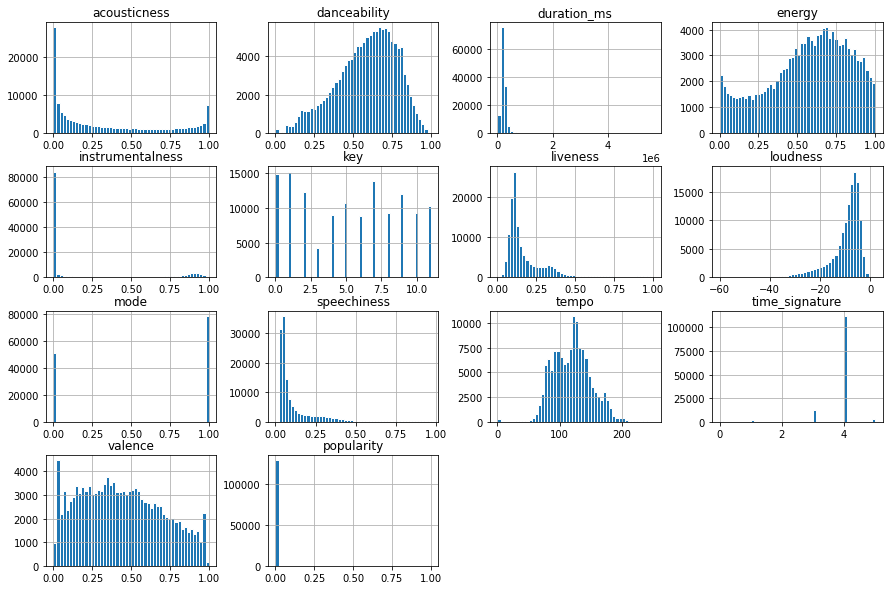

In [473]:
# visualizing distributions
df.hist(bins=50, figsize=(15,10), ec='w')
plt.show()

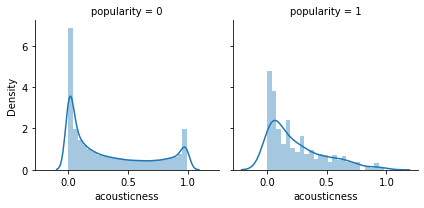

In [474]:
g = sns.FacetGrid(df, col = "popularity")
g.map(sns.distplot, "acousticness", bins = 25)
plt.show()

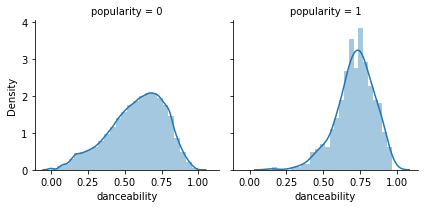

In [475]:
g = sns.FacetGrid(df, col = "popularity")
g.map(sns.distplot, "danceability", bins = 25)
plt.show()

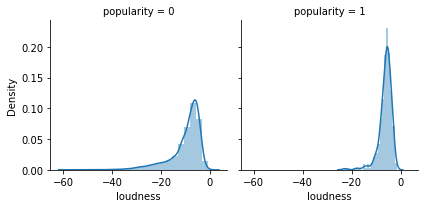

In [476]:
g = sns.FacetGrid(df, col = "popularity")
g.map(sns.distplot, "loudness", bins = 25)
plt.show()

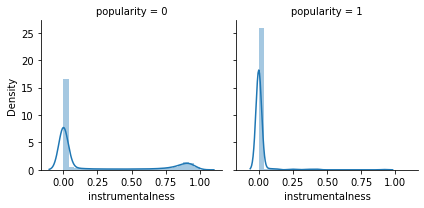

In [477]:
g = sns.FacetGrid(df, col = "popularity")
g.map(sns.distplot, "instrumentalness", bins = 25)
plt.show()

In [478]:
### Models

In [479]:
df.drop(["track_name","track_id","artist_name"],axis=1,inplace=True)

In [480]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [481]:
def change_type(var):
    df[var] = df[var].astype(int)

In [482]:
df = pd.get_dummies(df, columns=categorical_cols)

In [483]:
column=['key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_0',
       'mode_1', 'time_signature_0', 'time_signature_1', 'time_signature_3',
       'time_signature_4', 'time_signature_5']
for i in column:
    change_type(i)
      

In [508]:
#data preparation
y = df["popularity"].values
X=df.drop(["popularity"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [509]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [510]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2)  
acc_log_test = round(logreg.score(X_test, y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 99.69
Testing Accuracy: % 99.72


Text(0.5, 1.0, 'ROC')

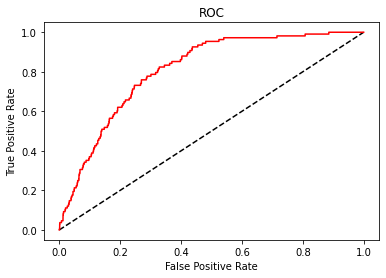

In [512]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

In [513]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(logreg,X_train,y_train,cv=k)
cross_val_log=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.99692003 0.99692003 0.99681003 0.99681003 0.99691969 0.99691969
 0.99691969 0.99691969 0.99691969 0.99691969]
Cross_val scores average:  0.9968978277213928


In [514]:
#GridSearchCV with Logreg
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(X_train,y_train)
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

Tuned hyperparameters : {'C': 0.001, 'penalty': 'l2'}
Best Accuracy: 0.9968978262775208


In [515]:
Logistic_score=logreg_cv.best_score_
CrossVal_Logistic_score=cross_val_log

In [523]:
Logistic_score

0.9968978262775208

In [524]:
CrossVal_Logistic_score

0.9968978277213928

In [ ]:
### SVM

In [568]:
from sklearn.svm import SVC
svm= SVC(random_state=1,probability=True)  #kernel='rbf'
svm.fit(X_train,y_train)
print("Train accuracy of svm algo:",svm.score(X_train,y_train))
print("Test accuracy of svm algo:",svm.score(X_test,y_test))

Train accuracy of svm algo: 0.9968978262782716
Test accuracy of svm algo: 0.9972278549244077


In [537]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(svm,X_train,y_train,cv=k) 
cv_result_svm= np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.99692003 0.99692003 0.99681003 0.99681003 0.99691969 0.99691969
 0.99691969 0.99691969 0.99691969 0.99691969]
Cross_val scores average:  0.9968978277213928


In [538]:
SVM_score= svm.score(X_test,y_test)
CrossVal_SVM_score=cv_result_svm

In [539]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
cv = GridSearchCV(pipeline,param_grid=parameters,cv=10)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

print("Tuned Model Parameters: {}".format(cv.best_params_))
print("Test accuracy: {}".format(cv.score(X_test, y_test)))

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.1}
Test accuracy: 0.9972278549244077


In [540]:
### Naive Bayes

In [541]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train,y_train)
print("Train accuracy of naive bayes:",nb.score(X_train,y_train))
print("Test accuracy of naive bayes:",nb.score(X_test,y_test))

Train accuracy of naive bayes: 0.3747469858312065
Test accuracy of naive bayes: 0.3726738365974486


In [542]:
Naive_bayes_score=nb.score(X_test,y_test)

In [543]:
### Decision Tree Classifier

In [544]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
DecisionTree_score=dt.score(X_test,y_test)
print("Train ccuracy of decision tree:",dt.score(X_train,y_train))
print("Test accuracy of decision tree:",dt.score(X_test,y_test))

Train ccuracy of decision tree: 0.9999669981518965
Test accuracy of decision tree: 0.9934033214404887


In [545]:
from sklearn.model_selection import cross_val_score
k =10
cv_result = cross_val_score(dt,X_train,y_train,cv=k) # uses R^2 as score 
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.99296007 0.99307007 0.99219008 0.99373006 0.99405941 0.99317932
 0.99273927 0.99306931 0.99317932 0.99273927]
Cross_val scores average:  0.9930916177086854


In [546]:
### Random Forest Classifier

In [547]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150,random_state = 3)
rf.fit(X_train,y_train)
print("Train ccuracy of random forest",rf.score(X_train,y_train))
print("Test accuracy of random forest",rf.score(X_test,y_test))
RandomForestClassifier_score=rf.score(X_test,y_test)
y_pred=rf.predict(X_test)
t_true=y_test

Train ccuracy of random forest 0.9999669981518965
Test accuracy of random forest 0.9973048589542852


In [548]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(rf,X_train,y_train,cv=k) # uses R^2 as score 
cv_result_randomforest=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.99692003 0.99692003 0.99692003 0.99681003 0.9970297  0.99691969
 0.99691969 0.99691969 0.99669967 0.99691969]
Cross_val scores average:  0.9968978265112838


In [549]:
CrossVal_RandomForestClassifier_score=cv_result_randomforest

In [550]:
### Confusion Matrix with Random Forest

In [551]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 4)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[38850     1]
 [  105     3]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38851
           1       0.75      0.03      0.05       108

    accuracy                           1.00     38959
   macro avg       0.87      0.51      0.53     38959
weighted avg       1.00      1.00      1.00     38959



In [569]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Random Forest', rf), ('SVM', svm)], 
                       voting='soft', weights=[2,1]).fit(X_train,y_train)
print('The train accuracy for Random Forest and SVM is:',ensemble.score(X_train,y_train))
print('The test accuracy for Random Forest and SVM is:',ensemble.score(X_test,y_test))

The train accuracy for Random Forest and SVM is: 0.9969858312065476
The test accuracy for Random Forest and SVM is: 0.9972278549244077


In [554]:
from sklearn.model_selection import cross_val_score
k = 5
cv_result = cross_val_score(ensemble,X_train,y_train,cv=k) # uses R^2 as score 
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.99691986 0.99691986 0.99686486 0.99686486 0.99691969]
Cross_val scores average:  0.9968978265188049


In [555]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# feature importance
print(model.feature_importances_)
# plot
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#pyplot.show()

[0.04404084 0.04732217 0.04509125 0.04495537 0.06800715 0.04971195
 0.05369927 0.04711036 0.04168114 0.04442554 0.02703697 0.03796995
 0.03921135 0.         0.02893467 0.01940748 0.05826665 0.04679062
 0.04191495 0.02834084 0.03907433 0.04445516 0.05267256 0.
 0.         0.         0.         0.0498794  0.        ]


In [558]:
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

thresholds = sort(model.feature_importances_) # Fit model using each importance as a threshold

for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True) # if prefit=True, you should call transform directly.
    select_X_train = selection.transform(X_train)
    # train model 
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # evaluate model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 99.73%
Thresh=0.000, n=29, Accuracy: 99.73%
Thresh=0.000, n=29, Accuracy: 99.73%
Thresh=0.000, n=29, Accuracy: 99.73%
Thresh=0.000, n=29, Accuracy: 99.73%
Thresh=0.000, n=29, Accuracy: 99.73%
Thresh=0.000, n=29, Accuracy: 99.73%
Thresh=0.019, n=23, Accuracy: 99.73%
Thresh=0.027, n=22, Accuracy: 99.72%
Thresh=0.028, n=21, Accuracy: 99.72%
Thresh=0.029, n=20, Accuracy: 99.72%
Thresh=0.038, n=19, Accuracy: 99.72%
Thresh=0.039, n=18, Accuracy: 99.73%
Thresh=0.039, n=17, Accuracy: 99.72%
Thresh=0.042, n=16, Accuracy: 99.72%
Thresh=0.042, n=15, Accuracy: 99.73%
Thresh=0.044, n=14, Accuracy: 99.72%
Thresh=0.044, n=13, Accuracy: 99.72%
Thresh=0.044, n=12, Accuracy: 99.73%
Thresh=0.045, n=11, Accuracy: 99.72%
Thresh=0.045, n=10, Accuracy: 99.73%
Thresh=0.047, n=9, Accuracy: 99.72%
Thresh=0.047, n=8, Accuracy: 99.72%
Thresh=0.047, n=7, Accuracy: 99.72%
Thresh=0.050, n=6, Accuracy: 99.72%
Thresh=0.050, n=5, Accuracy: 99.72%
Thresh=0.053, n=4, Accuracy: 99.72%
Thresh=0.054, n=3, Accuracy

In [559]:
### Comparison Of Performance

In [563]:
model_performances=pd.DataFrame({'Model':['RandomForestClassifier','SVM','DesicionTreeClassifier','LogisticRegession','NaiveBayes','Ridge'],
                                 'Accuracy':[RandomForestClassifier_score,SVM_score,DecisionTree_score,Logistic_score,Naive_bayes_score,Ridge_score]})
model_performances.sort_values(by = "Accuracy",ascending=False)

,Model,Accuracy
0,RandomForestClassifier,0.997305
1,SVM,0.997228
3,LogisticRegession,0.996898
2,DesicionTreeClassifier,0.993403
4,NaiveBayes,0.372674
5,Ridge,0.052528


### Conclusion
1. Data distribution of songs display today's songs features like dancebility, energy, loudness and tempo are quite high. People like fast and loud music.
2. According to instrumentalness, liveness and speechness, most of the songs are not live performances and they have lyrics.